# DATA Loading and Preparation

In [1]:
#Eliminate unnecessary warnings from notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load required libraries
import pandas as pd #for manipulation of tubular data
import numpy as np # for mathematical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import pandasql as pdsql #for running SQL queries
from datetime import datetime #for data visualization

reading the files

In [3]:
#import the file and ensure date is correct format and date is the index
country_data=pd.read_csv("C:\\Users\\kok\\Downloads\\Rugby data\\Raw data.csv",parse_dates=['date'])

In [4]:
#display first five rows
country_data.head()

,date,home_team,away_team,home_score,away_score,competition,stadium,city,country,neutral,world_cup
0,1871-03-27,Scotland,England,1,0,1871 Scotland v England International,Raeburn Place,Edinburgh,Scotland,False,False
1,1872-02-05,England,Scotland,2,1,1871–72 Home Nations International,The Oval,London,England,False,False
2,1873-03-03,Scotland,England,0,0,1872–73 Home Nations International,West of Scotland F.C.,Glasgow,Scotland,False,False
3,1874-02-23,England,Scotland,1,0,1873–74 Home Nations International,The Oval,London,England,False,False
4,1875-02-15,England,Ireland,2,0,1874–75 Home Nations rugby union matches,The Oval,London,England,False,False


In [5]:
#count number of rows and columns
country_data.shape

(2755, 11)

In [6]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2755 non-null   datetime64[ns]
 1   home_team    2755 non-null   object        
 2   away_team    2755 non-null   object        
 3   home_score   2755 non-null   int64         
 4   away_score   2755 non-null   int64         
 5   competition  2732 non-null   object        
 6   stadium      2755 non-null   object        
 7   city         2755 non-null   object        
 8   country      2755 non-null   object        
 9   neutral      2755 non-null   bool          
 10  world_cup    2755 non-null   bool          
dtypes: bool(2), datetime64[ns](1), int64(2), object(6)
memory usage: 199.2+ KB


the competiton column has nulls

In [7]:
#filling the nulls in teh comeptiton column
country_data['competition'].fillna('friendly',inplace=True)

In [8]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2755 non-null   datetime64[ns]
 1   home_team    2755 non-null   object        
 2   away_team    2755 non-null   object        
 3   home_score   2755 non-null   int64         
 4   away_score   2755 non-null   int64         
 5   competition  2755 non-null   object        
 6   stadium      2755 non-null   object        
 7   city         2755 non-null   object        
 8   country      2755 non-null   object        
 9   neutral      2755 non-null   bool          
 10  world_cup    2755 non-null   bool          
dtypes: bool(2), datetime64[ns](1), int64(2), object(6)
memory usage: 199.2+ KB


In [9]:
#Display a statsicial descripiton of the data
country_data.describe()

,date,home_score,away_score
count,2755,2755.000000,2755.000000
mean,1980-11-30 08:18:38.548094400,18.757895,15.557532
min,1871-03-27 00:00:00,0.000000,0.000000
25%,1960-07-09 00:00:00,9.000000,7.000000
50%,1994-07-03 00:00:00,16.000000,13.000000
75%,2010-02-13 00:00:00,26.000000,21.000000
max,2023-10-28 00:00:00,101.000000,70.000000
std,NaN,13.442925,11.422684


In [10]:
#check for duplicates
duplicates=country_data.duplicated(subset=['date','home_team','away_team','home_score','away_score','competition','stadium','city','country','neutral','world_cup'],keep=False)
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
2750    False
2751    False
2752    False
2753    False
2754    False
Length: 2755, dtype: bool


There are no duplicate rows

# EDA Starts Here

In [11]:
#check for data that only starts after rugby went pro
pro_date=pd.Timestamp('1995-08-26')

#filter for dataset to be since day rugby went pro
rugby_data=country_data[country_data['date']>=pro_date]

#final dataset
rugby_data.head()

,date,home_team,away_team,home_score,away_score,competition,stadium,city,country,neutral,world_cup
1417,1995-09-02,South Africa,Wales,40,11,Wales tour of South Africa,Ellis Park,Johannesburg,South Africa,False,False
1418,1995-10-14,France,Italy,34,22,1st Coupe Latine de Rugby,Ferrocaril Oeste,Buenos Aires,Argentina,True,False
1419,1995-10-17,Argentina,Italy,26,6,friendly,Monumental José Fierro,Tucumán,Argentina,False,False
1420,1995-10-21,Argentina,France,12,47,1995 Latin Cup,Estadio Etcheverry,Buenos Aires,Argentina,False,False
1421,1995-10-28,Italy,New Zealand,6,70,1995 New Zealand rugby union tour of Italy and...,Stadio Renato Dall'Ara,Bologna,Italy,False,False


In [12]:
rugby_data.shape

(1338, 11)

In [13]:
#adding a column for the wining team by defining a contidional mapping function to assign the winner of each match
def winning_team(rugby_data):
    if(rugby_data['home_score']>rugby_data['away_score']):
        return (rugby_data['home_team'])
    elif(rugby_data['home_score']<rugby_data['away_score']):
        return (rugby_data['away_team'])
    elif(rugby_data['home_score']==rugby_data['away_score']):
        return 'Draw'
    
rugby_data['winning_team']=rugby_data.apply(winning_team, axis=1)


In [14]:
#display first 5 rows of new dataset
rugby_data.head()

,date,home_team,away_team,home_score,away_score,competition,stadium,city,country,neutral,world_cup,winning_team
1417,1995-09-02,South Africa,Wales,40,11,Wales tour of South Africa,Ellis Park,Johannesburg,South Africa,False,False,South Africa
1418,1995-10-14,France,Italy,34,22,1st Coupe Latine de Rugby,Ferrocaril Oeste,Buenos Aires,Argentina,True,False,France
1419,1995-10-17,Argentina,Italy,26,6,friendly,Monumental José Fierro,Tucumán,Argentina,False,False,Argentina
1420,1995-10-21,Argentina,France,12,47,1995 Latin Cup,Estadio Etcheverry,Buenos Aires,Argentina,False,False,France
1421,1995-10-28,Italy,New Zealand,6,70,1995 New Zealand rugby union tour of Italy and...,Stadio Renato Dall'Ara,Bologna,Italy,False,False,New Zealand


In [15]:
#helper function to run queries
def run_query(query):
    return pdsql.sqldf(query,globals())

In [16]:
#making a dataset for the individual teams
query="""
with home_teams as (SELECT DISTINCT strftime('%Y', date) as year_played,
                            home_team as team_name,
                            SUM(home_score) as points_scored,
                            SUM(away_score) as points_against,
                            COUNT(home_team) as games_played 
                            from rugby_data rd 
                            where date > '1995-08-26'
                            group by 1,2
                            order by 1,home_team),
away_teams as (SELECT DISTINCT strftime('%Y', date) as year_played,
                        away_team as team_name,
                        SUM(away_score),
                        sum(home_score),
                        COUNT(away_team)
                        from rugby_data rd 
                        where date > '1995-08-26'
                        group by 1,2
                        order by 1,2),
team_data as (select year_played,
                     team_name,
                       sum(points_scored)over(PARTITION by year_played,team_name order by games_played rows between UNBOUNDED PRECEDING and current ROW  )as points,
                       sum(points_against)over(PARTITION by year_played,team_name order by games_played rows between UNBOUNDED PRECEDING and current ROW  )as against,
                       sum(games_played)over(PARTITION by year_played,team_name order by games_played rows between UNBOUNDED PRECEDING and current ROW  )as games
from (SELECT *
FROM home_teams h
UNION 
SELECT *
FROM away_teams)
)
select year_played,
	   team_name,
	   MAX(points) as points_scored,
       MAX(against)as points_conceded,
	   max(games) as games_played
from team_data
group by year_played,team_name
"""
Teams_df=run_query(query)
print(Teams_df)

    year_played     team_name  points_scored  points_conceded  games_played
0          1995     Argentina             38               53             2
1          1995       England             14               24             1
2          1995        France            115               86             4
3          1995         Italy             55              170             4
4          1995   New Zealand            122               40             3
..          ...           ...            ...              ...           ...
281        2023         Italy            130              338             8
282        2023   New Zealand            336              180            10
283        2023      Scotland            187              203             9
284        2023  South Africa            279              174            11
285        2023         Wales            194              262            10

[286 rows x 5 columns]


In [17]:
#checking for any duplicates in the teams dataframe
duplicates_df=Teams_df.duplicated(subset=['year_played','team_name'],keep=False)
print(duplicates_df)

0      False
1      False
2      False
3      False
4      False
       ...  
281    False
282    False
283    False
284    False
285    False
Length: 286, dtype: bool


what is the avergae winning margin for teams over the years

In [18]:
#getting winning margins for teams
rugby_data['winning_margin']=abs(rugby_data['home_score']-rugby_data['away_score'])

#calculating the average winning margins per year
average_winning_margin_yearly=rugby_data.groupby(rugby_data['date'].dt.year)['winning_margin'].mean().reset_index()

print(average_winning_margin_yearly)

    date  winning_margin
0   1995       24.555556
1   1996       13.275000
2   1997       20.116279
3   1998       18.725000
4   1999       19.847826
5   2000       16.800000
6   2001       16.157895
7   2002       17.837209
8   2003       18.714286
9   2004       17.304348
10  2005       14.023810
11  2006       14.081633
12  2007       17.870370
13  2008       15.288462
14  2009       12.468085
15  2010       13.735849
16  2011       10.652174
17  2012       13.200000
18  2013       14.960000
19  2014       12.314815
20  2015       13.755102
21  2016       14.821429
22  2017       16.244898
23  2018       14.267857
24  2019       16.500000
25  2020       14.060606
26  2021       15.195652
27  2022       12.905660
28  2023       17.063830


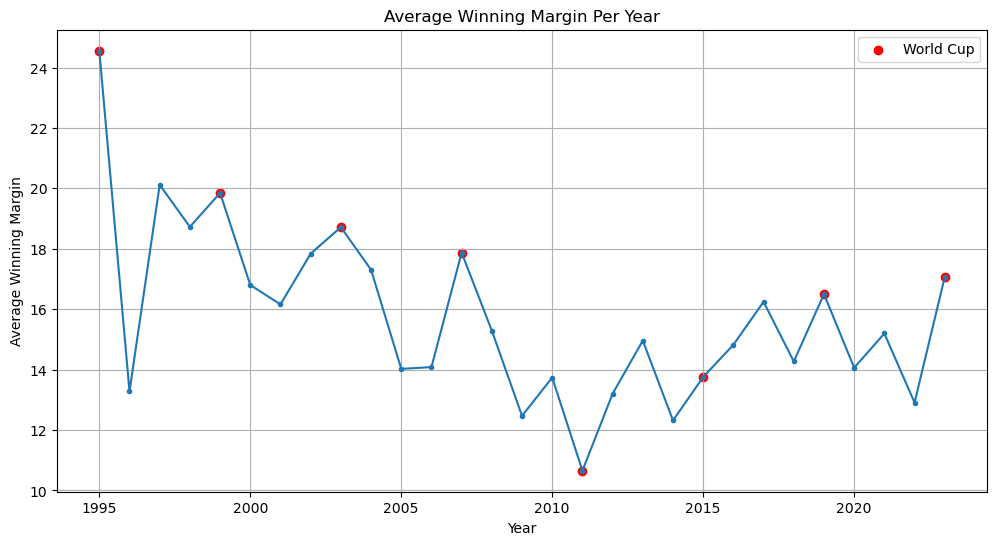

In [27]:
#showing this on a line graph
plt.figure(figsize=(12,6))

plt.plot(average_winning_margin_yearly['date'],average_winning_margin_yearly['winning_margin'],marker='.')

#adding markers for world cup years
world_cup_years=[1995,1999,2003,2007,2011,2015,2019,2023]
marker_mask=average_winning_margin_yearly['date'].isin(world_cup_years)
plt.scatter(average_winning_margin_yearly['date'][marker_mask],average_winning_margin_yearly['winning_margin'][marker_mask],color='red',marker='o',label='World Cup')

#labelling the axis
plt.xlabel('Year')
plt.ylabel('Average Winning Margin')
plt.title('Average Winning Margin Per Year')

plt.legend()
plt.grid(True)
plt.show()


The winning margin has become less over the yer betwene the top 10 teams,an average margin of less than 18 points in the last 10 years shows just how competitve it is.
The 2011 World cup being the most competitive worlcup since the game went pro.

What is the probabilty of Home team winning over the years?

In [60]:
#filtering out games played in neutral venues
non_neutral_games=rugby_data[rugby_data['neutral']==False]

#adding the year column
non_neutral_games['year']=non_neutral_games['date'].dt.year

#getting number of games and number of home team wins
stats=non_neutral_games.groupby('year').agg(
        total_games=('date','size'),
        home_wins=('winning_team', lambda x: (x == x.str.split(' ').str[0]).sum())
)
#calculating the probability of hometeam winning
stats['probablity_of_home']=stats['home_wins']/stats['total_games']

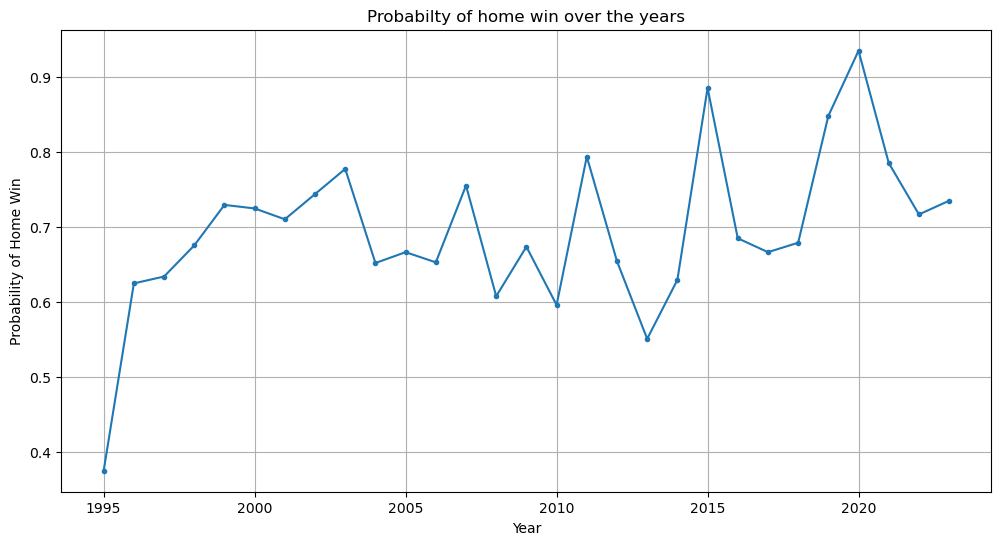

In [62]:
#plotting the probability
plt.figure(figsize=(12,6))

plt.plot(stats.index,stats['probablity_of_home'],marker='.')
plt.xlabel('Year')
plt.ylabel('Probability of Home Win')
plt.title('Probabilty of home win over the years')

plt.grid(True)
plt.show()

Despite the games being more competitive over the years, we also see how crucial home advantage has become as time goes by with team becoming  harder to beat when they play at home.

In [56]:
non_neutral_games.head()

,date,home_team,away_team,home_score,away_score,competition,stadium,city,country,neutral,world_cup,winning_team,winning_margin,year
1417,1995-09-02,South Africa,Wales,40,11,Wales tour of South Africa,Ellis Park,Johannesburg,South Africa,False,False,South Africa,29,1995
1419,1995-10-17,Argentina,Italy,26,6,friendly,Monumental José Fierro,Tucumán,Argentina,False,False,Argentina,20,1995
1420,1995-10-21,Argentina,France,12,47,1995 Latin Cup,Estadio Etcheverry,Buenos Aires,Argentina,False,False,France,35,1995
1421,1995-10-28,Italy,New Zealand,6,70,1995 New Zealand rugby union tour of Italy and...,Stadio Renato Dall'Ara,Bologna,Italy,False,False,New Zealand,64,1995
1422,1995-11-11,France,New Zealand,22,15,1995 New Zealand tour,Stadium Municipal,Toulouse,France,False,False,France,7,1995


In [61]:
stats.head()

,total_games,home_wins,probablity_of_home
year,,,
1995,8,3,0.375000
1996,40,25,0.625000
1997,41,26,0.634146
1998,37,25,0.675676
1999,37,27,0.729730
